In [43]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('kunden_einkaufszentrum.csv')

C:\Users\astartz\AppData\Local\Temp\ipykernel_44420\3615851575.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)


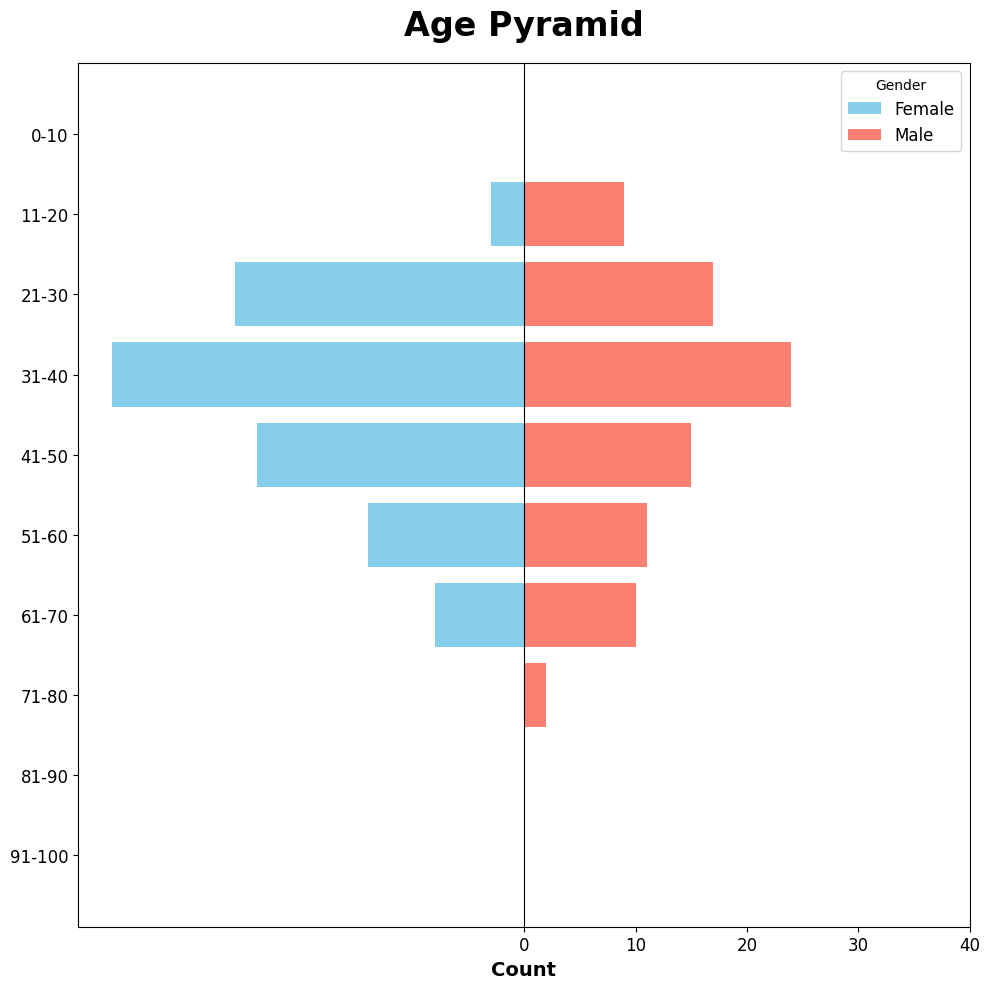

In [47]:
#AGE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Datenvorbereitung: Altersgruppen definieren
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Gruppierung nach Altersgruppen und Geschlecht
grouped_data = data.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Daten für die Pyramide extrahieren
age_groups = labels  # Altersgruppen
group1 = grouped_data['Female'].values  # Linke Gruppe (z. B. Frauen)
group2 = grouped_data['Male'].values    # Rechte Gruppe (z. B. Männer)

# Positionen für die Altersgruppen
y = np.arange(len(age_groups))

# Erstellung der Bevölkerungspyramide
plt.figure(figsize=(10, 10))
plt.barh(y, -group1, color='skyblue', label='Female', align='center')  # Linke Gruppe mit Farbe 'skyblue'
plt.barh(y, group2, color='salmon', label='Male', align='center')      # Rechte Gruppe mit Farbe 'salmon'

# Mittige Beschriftung der Altersgruppen
plt.yticks(y, age_groups, fontsize=12)
plt.xticks(np.arange(0, max(max(group1), max(group2)) + 10, 10), fontsize=12)
plt.gca().set_xticklabels([abs(x) for x in plt.gca().get_xticks()])  # Positive Beschriftungen für x-Achse
plt.xlabel('Count', fontsize=14, fontweight='bold', color='black')
plt.title('Age Pyramid', fontsize=24, fontweight='bold', color='black', pad=20)

# Zentrierung der Altersgruppen
plt.axvline(0, color='black', linewidth=0.8)  # Linie bei 0 zur Abgrenzung
plt.gca().invert_yaxis()  # Altersgruppen von oben nach unten darstellen

# Legende
plt.legend(title="Gender", loc="upper right", fontsize=12)

# Layout-Optimierung
plt.tight_layout()

# Diagramm anzeigen
plt.show()


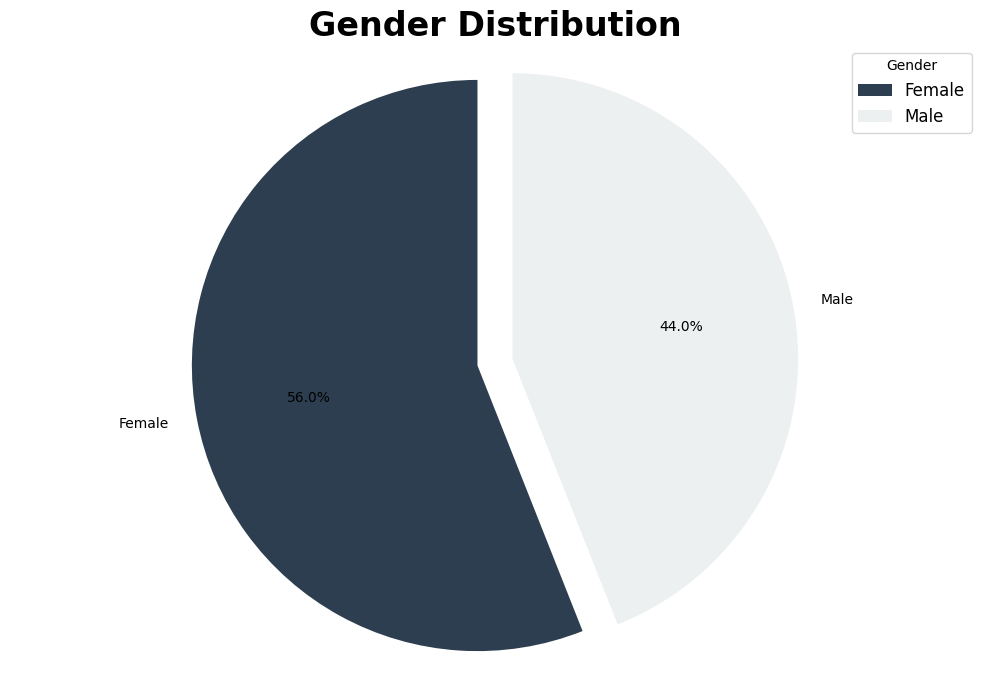

In [37]:
# Gender Distribution


# Labels und Daten
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['#2C3E50', '#ECF0F1']
explode = [0, 0.1]

# Einstellungen für die Darstellung
plt.figure(figsize=(10, 7))
plt.pie(
    size,
    colors=colors,
    explode=explode,
    labels=labels,
    shadow=False,  
    autopct='%.1f%%',  # Einfache Prozentanzeige mit 1 Dezimalstelle
    startangle=90, # Startwinkel für besseren Vergleich
    radius=0.8
)

# Titel und Legende
plt.title('Gender Distribution', fontsize=24, fontweight='bold', color='black')
plt.legend(title="Gender", loc="upper right", fontsize=12)
plt.axis('equal')  # Sicherstellen, dass der Kreis nicht verzerrt wird
plt.tight_layout()  # Optimierung der Abstände

# Graph anzeigen
plt.show()